In [226]:
#@Darko Gilbert
#25-04-2019


#Self-study tasks
#Computational Photonics 2019


import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as intg
import scipy.special as special


Text(0.5, 1.0, 'A graph of x1 against sin(x1).')

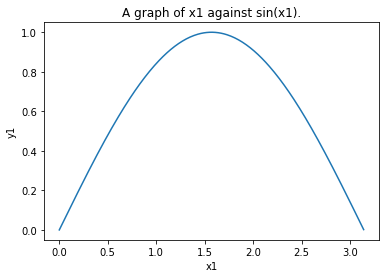

In [10]:
#Problem 1a
deltax1 = 0.01
x1 = np.arange(0, np.pi, deltax1)
y1 = np.sin(x1)

plt.plot(x1, y1)
plt.xlabel("x1")
plt.ylabel("y1")
plt.title("A graph of x1 against sin(x1).")

Text(0.5, 1.0, 'A graph of x2 against exp(x2).')

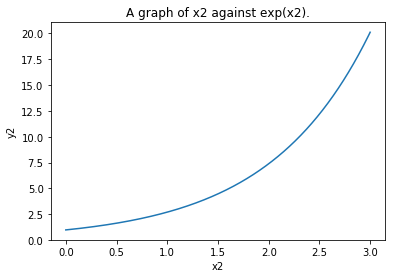

In [13]:
#Problem 1b
x2 = np.linspace(0, 3, 1024)
y2 = np.exp(x2)

plt.plot(x2, y2)
plt.xlabel("x2")
plt.ylabel("y2")
plt.title("A graph of x2 against exp(x2).")

In [27]:
#Problem 1c
A = np.arange(1, 10).reshape(3,3)
v = A[0]
w = A[:, 1]
A = A[:2]

In [37]:
#Problem 1d
def mymatrixsum(A):
    A = np.asarray(A) #Convert input to numpy arrays
    sum = A.sum()
    return sum
    

In [96]:
#Problem 1e
A = np.ones((1000, 1000)).astype(np.int)
for row_index, row in enumerate(A):
    for column_index, column in enumerate(row):
        if (row_index%2) == 1:
            A[row_index, column_index] = 0
        if (column_index%2) == 1:
            A[row_index, column_index] = 0
            
B = np.ones((1000, 1000)).astype(np.int)
for row_index, row in enumerate(B):
    for column_index, column in enumerate(row):
        if ((row_index%2) == 0) & ((column_index%2) ==1):#If the column_index is odd and row_index is even value is 0
            B[row_index, column_index] = 0
        if ((row_index%2) == 1) & ((column_index%2) ==0):#If the column_index is even and row_index is odd value is 0
                B[row_index, column_index] = 0

In [397]:
#Problem 2 Numerical differentiation
#2a
# I don't seem to see the bug with in implementing the equation.
u = 10**(-6)
B = np.array([0.6961663*u, 0.4079426*u, 0.8974794*u])
C = np.array([0.0684043, 0.1162414, 9.896161])
rIndex = lambda y : 1 + (B[0]*y**2)/(y**2-C[0]**2) + (B[1]*y**2)/(y**2-C[1]**2) + (B[2]*y**2)/(y**2-C[2]**2) 
rIndex(0.21*10**(-3))**0.5

0.9999999999960535

In [332]:
B[2]

8.974794e-07

In [265]:
#Problem 3 Numerical integration
z = 3*u
lamda = 1*u
def IIo(x3):
    u3 = x3*np.sqrt(2.0/(lamda*z))
    Su, Cu = special.fresnel(u3)
    return (1/8)*((((2*Cu) + 1)**2) + (((2*Cu) + 1)**2))

u3 = np.linspace(-5, 5, 50
                )
IIov = IIo(u3)

In [330]:
rIndex.max()

nan

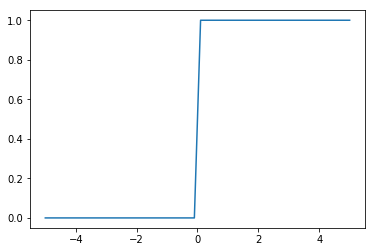

In [266]:
plt.plot(u3, IIov)

In [270]:
#4 Linear equations
#2b
from numpy.linalg import solve
A = np.array([[ 4,-1,-1,-1 ],
           [ -1,0,3,0 ],
           [ -1,3,0,-1 ],
           [ -1,-1,0,4]], float)
v = np.array([ 5, 5, 0, 0 ],float)
print(solve(A,v))


#2c

A = np.array([[ 4,-1,-1,-1 ],
           [ -1,0,3,0 ],
           [ -1,3,0,-1 ],
           [ -1,-1,0,4]], float)
v = np.array([ 5, 5, 0, 0 ],float)
N = len(v)

# Gaussian elimination
for m in range(N):

    # Divide by the diagonal element
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div

    # Now subtract from the lower rows
    for i in range(m+1,N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]

# Backsubstitution
x = np.empty(N,float)
for m in range(N-1,-1,-1):
    x[m] = v[m]
    for i in range(m+1,N):
        x[m] -= A[m,i]*x[i]

print(x)

[2.34042553 1.06382979 2.44680851 0.85106383]
[2.34042553 1.06382979 2.44680851 0.85106383]


In [322]:
#5 Root finding
import scipy.constants as cons
import scipy.optimize as opt
G = cons.gravitational_constant
G = 6.674 * 10**-11
M = 5.974 * 10**24
m = 7.348 * 10**22
R = 3.844 * 10**8
w = 2.662 * 10**-6

def magicalPoint (r):
    return G * M * (R - r) ** 2 - G * m * r ** 2 - w ** 2 * r ** 3 * (R - r) ** 2

def magicalPointPrime(r):
    return -2 * G * M * (R - r) - 2 * G * m * r - 3 * w ** 2 * r ** 2 * (R - r) ** 2  \
    + 2 * w ** 2 * r ** 3 * (R - r)

In [323]:
point_r = opt.root_scalar(magicalPoint, fprime=magicalPointPrime, x0=3*10**8, method='newton')

In [325]:
point_r.root, point_r.converged, point_r.iterations

(326045071.66535544, True, 6)